In [46]:
import pandas as pd
import numpy as np
import plotly.express as px

## Importing the data

In [5]:
df = pd.read_csv("predictions.csv")

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,57,retired,married,secondary,no,718,no,no,cellular,3,jun,170,1,-1,0,unknown,no
1,50,management,married,secondary,no,268,no,no,cellular,3,jun,74,2,90,2,failure,no
2,46,technician,single,secondary,no,4367,yes,no,cellular,3,jun,65,1,96,1,failure,no
3,56,admin.,married,secondary,no,3554,no,no,cellular,3,jun,151,1,-1,0,unknown,no
4,32,services,single,tertiary,no,785,no,no,cellular,3,jun,273,1,-1,0,unknown,no


# Data Preprocessing

## Missing Values

In [17]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Duplicate Values

In [21]:
df.duplicated().sum()

0

## Ensuring appropriate data types for every column

In [29]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

# Data analysis

## Summary for numerical columns

In [61]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000
mean,43.942238,2037.724045,14.188256,283.791787,1.855498,103.462099,1.829783
std,15.954058,3898.173799,8.483453,241.441834,1.343656,137.157167,2.985956
min,18.000000,-1206.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,31.000000,270.500000,7.000000,134.500000,1.000000,-1.000000,0.000000
50%,39.000000,889.000000,13.000000,220.000000,1.000000,87.000000,1.000000
75%,56.000000,2346.500000,21.000000,355.000000,2.000000,181.000000,3.000000
max,95.000000,81204.000000,31.000000,3785.000000,16.000000,871.000000,55.000000


## Summary for categorical columns

In [73]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,5211,5211,5211,5211,5211,5211,5211,5211,5211,5211
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,aug,unknown,no
freq,1292,2828,2209,5205,4112,4897,4371,1032,2352,4544


## Distribution of age

In [91]:
# Define a function to categorize age
def age_grouping(age):
    if age < 30:
        return '<30'
    elif 30 <= age <= 50:
        return '30-50'
    else:
        return '>50'

df['age_group'] = df['age'].apply(age_grouping)

In [107]:
distribution_age=df.groupby(['age_group','y']).size().unstack().reindex(["<30","30-50",">50"])
distribution_age

y,no,yes
age_group,,
<30,862,137
30-50,2275,234
>50,1407,296


## Distribution across job types

In [221]:
distribution_job = df.groupby(['job','y']).size().unstack()
distribution_job

y,no,yes
job,,
admin.,617,71
blue-collar,314,35
entrepreneur,78,4
housemaid,138,15
management,1139,153
retired,640,187
self-employed,151,14
services,220,24
student,361,53


## Distribution across marital status

In [112]:
distribution_marital = df.groupby(['marital','y']).size().unstack()
distribution_marital

y,no,yes
marital,,
divorced,400,82
married,2486,342
single,1658,243


## Distribution across education

In [115]:
distribution_education = df.groupby(['education','y']).size().unstack()
distribution_education

y,no,yes
education,,
primary,478,103
secondary,1920,289
tertiary,1844,251
unknown,302,24


## Distribution depending on the outcome

In [126]:
distribution_outcome = df.groupby(['poutcome','y']).size().unstack()
distribution_outcome

y,no,yes
poutcome,,
failure,1064,107
other,452,58
success,955,223
unknown,2073,279


# Data Visualization

## Age Distribution

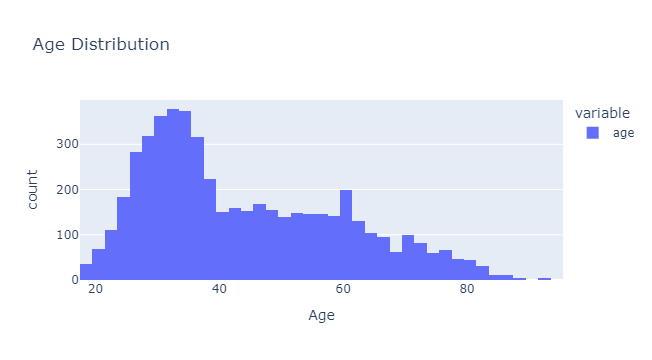

In [148]:
fig = px.histogram(df['age'],
                   title="Age Distribution",
                   labels={'value':'Age'},)

fig.show()

## Distribution of type of jobs

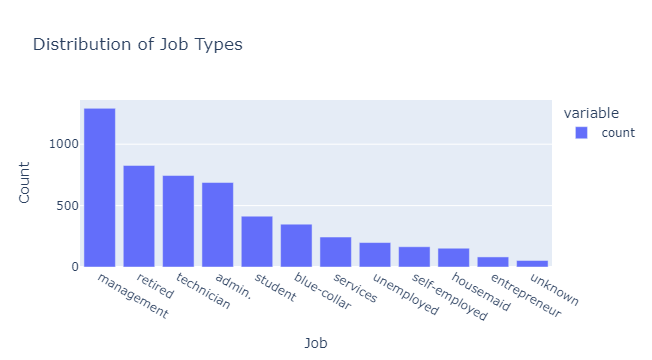

In [178]:
fig = px.bar(df['job'].value_counts(),
             title="Distribution of Job Types",
             labels={'job':'Job','value':'Count'})

fig.show()

## Balance Distribution by the Target Prediction

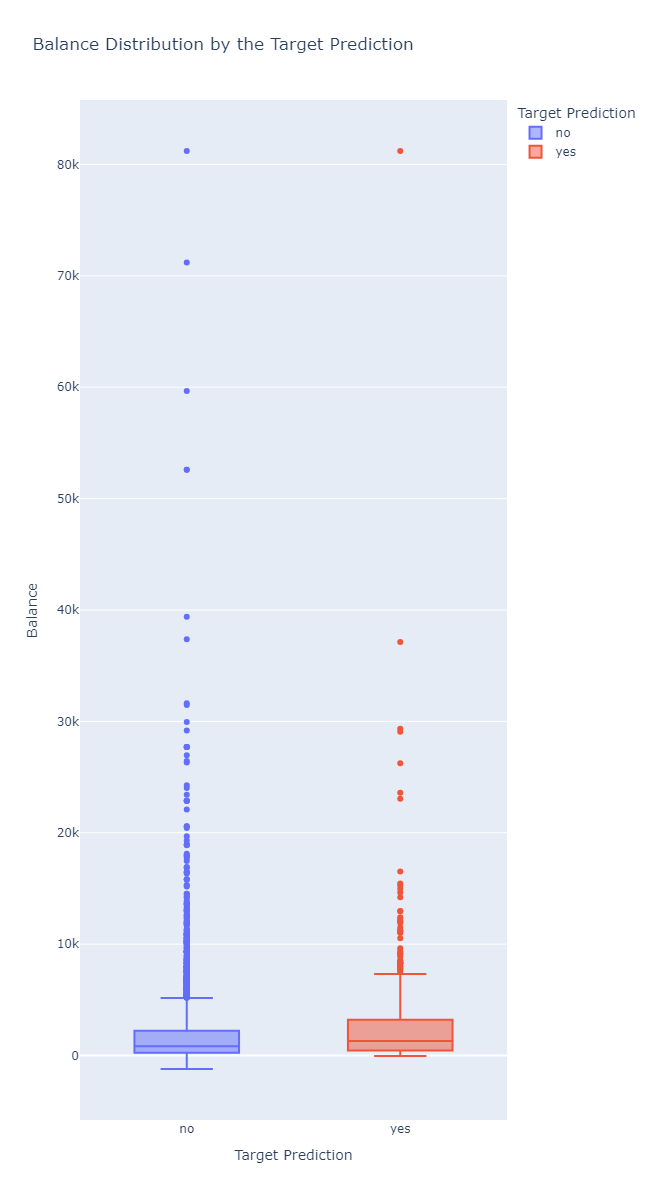

In [227]:
fig = px.box(df,
             x='y', y='balance',
             color='y',
             title='Balance Distribution by the Target Prediction',
             labels={'y':'Target Prediction','balance':'Balance'},
             height=1200)

fig.show()

## Distribution of Job types and Prediction

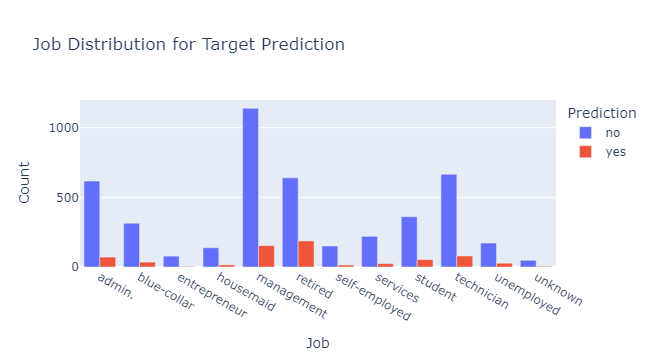

In [230]:
fig = px.bar(distribution_job,
             x=distribution_job.index,
             y=distribution_job.columns,
             barmode="group",
             title="Job Distribution for Target Prediction",
             labels={'job':'Job','value':"Count",'y':'Prediction'})

fig.show()

## Distribution of Age groups

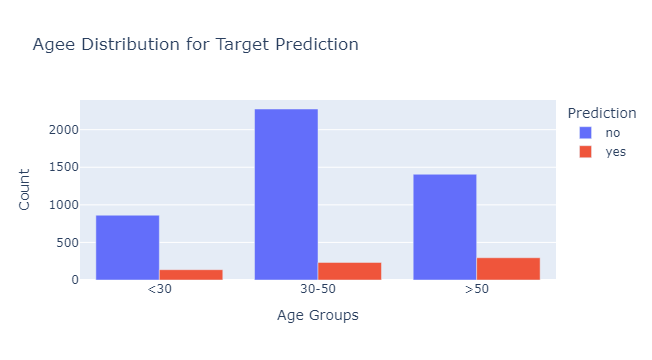

In [235]:
fig = px.bar(distribution_age,
             x=distribution_age.index,
             y=distribution_age.columns,
             barmode="group",
             title="Agee Distribution for Target Prediction",
             labels={'age_group':'Age Groups','value':"Count",'y':'Prediction'})

fig.show()

## Age vs Balance

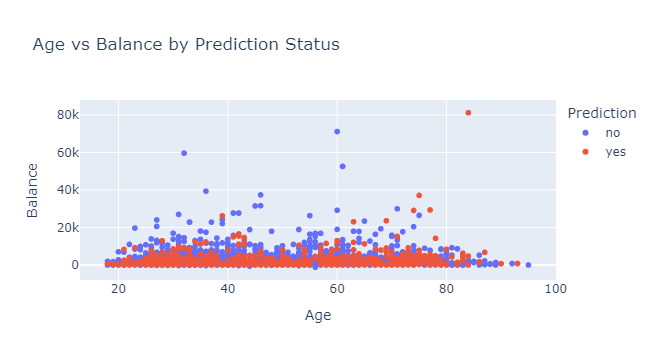

In [252]:
fig = px.scatter(df,
                 x='age', y='balance',
                 color='y', 
                 title='Age vs Balance by Prediction Status',
                 labels={'age':'Age','balance':'Balance','y':'Prediction'})

fig.show()

In [263]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_group'],
      dtype='object')

## Correlation

In [269]:
object_cols=['job','marital','education','default','housing','loan','contact','month','poutcome','y','age_group']

temp_df = df.copy()
# dropping obj type columns
temp_df = temp_df.drop(columns=object_cols)

bounds = {}
for col in temp_df.columns:
    q1 = np.quantile(temp_df[col], 0.25)
    q3 = np.quantile(temp_df[col], 0.75)
    iqr = q3 - q1
    bounds[col] = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
    
for col, (lb, ub) in bounds.items():
    temp_df = temp_df[(temp_df[col] >= lb) & (temp_df[col] <= ub)]
    
corr_matrix = temp_df.corr()
corr_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.130447,0.041742,0.113613,0.021113,-0.019033,0.000312
balance,0.130447,1.000000,0.023278,0.083564,0.050662,0.041109,0.027864
day,0.041742,0.023278,1.000000,-0.022639,0.041599,0.054840,-0.002154
duration,0.113613,0.083564,-0.022639,1.000000,0.043934,0.079722,0.071178
campaign,0.021113,0.050662,0.041599,0.043934,1.000000,0.027889,0.032568
pdays,-0.019033,0.041109,0.054840,0.079722,0.027889,1.000000,0.525227
previous,0.000312,0.027864,-0.002154,0.071178,0.032568,0.525227,1.000000


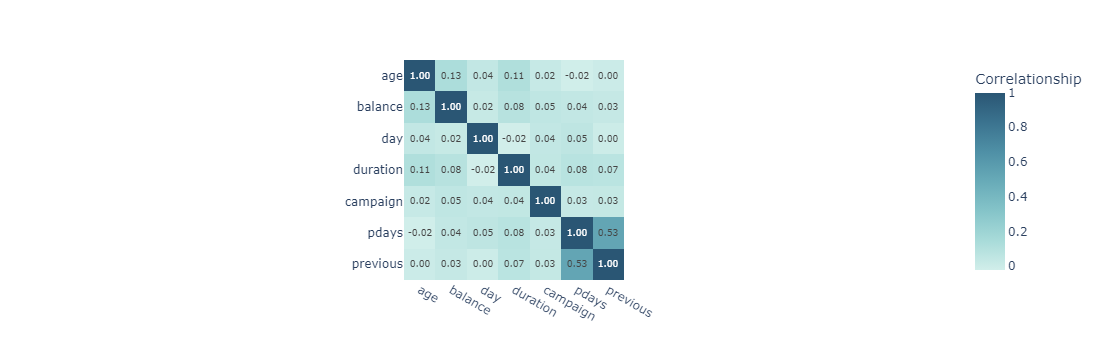

In [365]:
fig = px.imshow(corr_matrix,
                text_auto=".2f",
                labels={'color':'Correlationship'},
                color_continuous_scale="teal",)

fig.show()

## Time-Anal

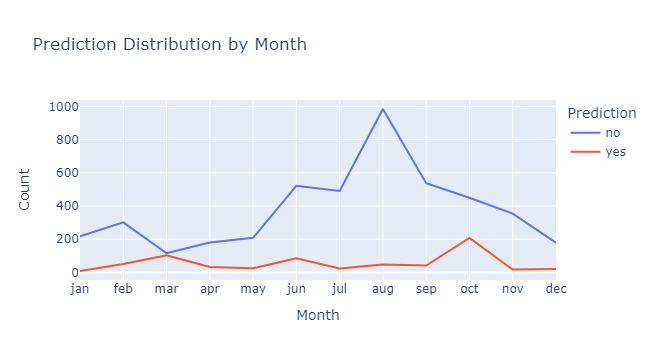

In [351]:
monthly=df.groupby(['month','y']).size().unstack().reindex(
    ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])

fig = px.line(monthly,
              color='y',
              title="Prediction Distribution by Month",
              labels={'month':'Month','value':'Count','y':'Prediction'})

fig.show()

In [369]:
df.to_csv("prediction_data.csv")